In [1]:
# %pip install python-dotenv
# %pip install seaborn
# %pip install tensorflow_data_validation
#  %pip install git+https://github.com/tensorflow/docs



In [2]:
import os
import pandas as pd
import geopandas as gpd
import pygeos as pg
import numpy as np
# import tensorflow as tf
# import tensorflow_data_validation as tfdv
import sklearn as sk
import scipy as sp
import seaborn as sns
# from datetime import datetime
# from dotenv import load_dotenv
from IPython.display import clear_output
from matplotlib import pyplot as plt
from shapely import wkt


f:\Programs\Miniconda3\envs\ml\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\Red\AppData\Local\Temp\ipykernel_332416\2532399237.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.i

In [3]:
# The following lines adjust the granularity of reporting.
#pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
os.chdir('F:\\Uni Files\\4710\\4710 Project\\MLweatherForestFire')


In [4]:
def getGPDfromPD(df: pd.DataFrame, geomCol: str, crs: str = "EPSG:3978") -> gpd.GeoDataFrame:
    """
    Convert a pandas dataframe to a geopandas dataframe
    :param df: pandas dataframe
    :param geomCol: name of the geometry column
    :param crs: coordinate reference system
    :return: geopandas dataframe
    """
    if 'geom' in df.columns:
        df.rename(columns={'geom': 'geometry'}, inplace=True)

    df[geomCol] = df[geomCol].apply(wkt.loads)
    gdf = gpd.GeoDataFrame(df, geometry=geomCol, crs=crs)
    return gdf


In [5]:
fireWeatherTable = "Data/FinalFeatureV2.csv"
dfFireWeather = pd.read_csv(fireWeatherTable)


In [6]:
dfEval = dfFireWeather.copy(deep=True)
dfEval.describe()

,ENTRYID,YEAR,MONTH,DAY,SIZE_HA,SIZE_HA_BIN,ELEVATIONM,DIST_TO_WATER,DAYW,MAXTEMP,MEANHUMIDITY,MEANWINDSPEED,MAXWINDSPEED,TOTALPRECIP,LONG,LAT,LONGBIN,LATBIN,utc,7daySumMaxTemp,7daySumHumidity,7daySumWindSpeed,14daySumMaxTemp,14daySumHumidity,14daySumWindSpeed
count,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0
mean,1143.2,2009.5,6.4,16.7,10705.3,1.7,742.7,3881.6,15.7,23.1,61.2,8.3,16.2,0.2,5375901.9,2375607.2,365.0,384.7,1261799138755980800.0,11.8,31.6,3.8,11.8,31.6,3.8
std,1439.2,5.3,1.1,9.0,29415.9,1.1,513.4,4094.2,9.0,6.4,12.1,3.4,5.9,1.5,139093.0,204885.0,111.1,97.6,167734934973968416.0,12.5,32.4,4.3,12.5,32.4,4.3
min,283.0,2000.0,1.0,2.0,201.8,0.0,225.0,0.0,1.0,-6.2,28.0,2.1,4.0,0.0,4918132.3,1567321.0,0.0,0.0,956880000000000000.0,-9.1,0.0,0.0,-9.1,0.0,0.0
25%,522.8,2005.0,6.0,8.0,704.4,1.0,434.0,1114.6,7.0,21.1,53.0,5.9,11.0,0.0,5267895.2,2246671.4,278.5,323.0,1120867200000000000.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,753.5,2010.0,6.0,17.0,2070.2,2.0,496.0,2467.7,16.0,24.4,61.0,7.5,16.0,0.0,5379082.5,2392909.7,367.5,393.0,1276905600000000000.0,0.0,38.0,2.1,0.0,38.0,2.1
75%,1539.2,2015.0,7.0,25.0,7250.0,3.0,1161.0,5318.9,24.0,26.9,68.6,10.2,20.0,0.0,5493470.9,2524069.0,459.0,455.0,1431734400000000000.0,24.6,62.4,7.0,24.6,62.4,7.0
max,10650.0,2020.0,10.0,31.0,476376.8,3.0,3668.0,29418.8,30.0,34.9,96.9,30.1,37.0,20.8,5632110.7,2763468.2,569.0,569.0,1593388800000000000.0,34.5,93.7,19.3,34.5,93.7,19.3


In [7]:
# log transform SIZE_HA
dfEval['SIZE_HA'] = np.log(dfEval['SIZE_HA'])

# binning SIZE_HA into 4 categories L M H E in SIZE_HA_BIN
dfEval['SIZE_HA_BIN'] = pd.qcut(dfEval['SIZE_HA'], 4, labels=['L', 'M', 'H', 'E'])

# count the number of fires in each SIZE_HA_BIN
dfEval['SIZE_HA_BIN'].value_counts()

L    209
M    209
H    209
E    209
Name: SIZE_HA_BIN, dtype: int64

In [8]:
# print rows with nan
print(dfEval.describe())

       ENTRYID   YEAR  MONTH   DAY  SIZE_HA  ELEVATIONM  DIST_TO_WATER  DAYW  \
count    836.0  836.0  836.0 836.0    836.0       836.0          836.0 836.0   
mean    1143.2 2009.5    6.4  16.7      7.8       742.7         3881.6  15.7   
std     1439.2    5.3    1.1   9.0      1.6       513.4         4094.2   9.0   
min      283.0 2000.0    1.0   2.0      5.3       225.0            0.0   1.0   
25%      522.8 2005.0    6.0   8.0      6.6       434.0         1114.6   7.0   
50%      753.5 2010.0    6.0  17.0      7.6       496.0         2467.7  16.0   
75%     1539.2 2015.0    7.0  25.0      8.9      1161.0         5318.9  24.0   
max    10650.0 2020.0   10.0  31.0     13.1      3668.0        29418.8  30.0   

       MAXTEMP  MEANHUMIDITY  MEANWINDSPEED  MAXWINDSPEED  TOTALPRECIP  \
count    836.0         836.0          836.0         836.0        836.0   
mean      23.1          61.2            8.3          16.2          0.2   
std        6.4          12.1            3.4           5.9

In [9]:
# Store our random selection, run once
# randomTrain = "RandomTrain"
# dfTrain.to_sql(randomTrain, db_push_con, if_exists='replace', index=False)

# randomTest = "RandomTest"
# dfTest.to_sql(randomTest, db_push_con, if_exists='replace', index=False)

# randomValidate = "RandomValidate"
# dfValidate.to_sql(randomValidate, db_push_con, if_exists='replace', index=False)


In [10]:
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
# from sklearn.metrics import classification_report
# from sklearn.inspection import DecisionBoundaryDisplay


In [11]:
dfEval.columns


Index(['ENTRYID', 'FIRE_ID', 'FIRENAME', 'YEAR', 'MONTH', 'DAY', 'REP_DATE',
       'SIZE_HA', 'SIZE_HA_BIN', 'GEOM', 'ELEVATIONM', 'DIST_TO_WATER',
       'CLIMATEID', 'PROVINCECODE', 'DAYW', 'MAXTEMP', 'MEANHUMIDITY',
       'MEANWINDSPEED', 'MAXWINDSPEED', 'TOTALPRECIP', 'RAIN', 'LONG', 'LAT',
       'LONGBIN', 'LATBIN', 'utc', '7daySumMaxTemp', '7daySumHumidity',
       '7daySumWindSpeed', '7dayRain', '14daySumMaxTemp', '14daySumHumidity',
       '14daySumWindSpeed', '14dayRain'],
      dtype='object')

In [12]:
# sum of size_ha column
dfEval['SIZE_HA'].sum()

6551.109478673032

In [13]:
dfTrim = dfEval.copy(deep=True)

# edit this
dfTrim = dfTrim.drop(columns={'ENTRYID', 'FIRE_ID', 'FIRENAME', 'GEOM', 'CLIMATEID', 'PROVINCECODE',
                              'TOTALPRECIP', 'LONG', 'LAT', 'REP_DATE', 'SIZE_HA', 'utc'})


In [14]:
# replace size_ha_bin 0 1 2 3 with L M H E

# dfTrim['SIZE_HA_BIN'] = dfTrim['SIZE_HA_BIN'].astype(str).replace('0', 'L')
# dfTrim['SIZE_HA_BIN'] = dfTrim['SIZE_HA_BIN'].astype(str).replace('1', 'M')
# dfTrim['SIZE_HA_BIN'] = dfTrim['SIZE_HA_BIN'].astype(str).replace('2', 'H')
# dfTrim['SIZE_HA_BIN'] = dfTrim['SIZE_HA_BIN'].astype(str).replace('3', 'E')


In [15]:
# randomly select 6 years from 2010-2019 for training
dfTrain = dfTrim[dfTrim['YEAR'].isin(
    [2010, 2011, 2012, 2013, 2014, 2015, 2016])].drop(columns={'SIZE_HA_BIN'})
dfTest = dfTrim[dfTrim['YEAR'].isin([2017, 2018, 2019, 2020])].drop(
    columns={'SIZE_HA_BIN'})


In [16]:
def scaleData(df: pd.DataFrame) -> pd.DataFrame:
    mean = df.mean()
    std = df.std()
    # regularize y values using z score
    df = (df - mean) / std
    # set max value to 3 zscore
    df[df > 3] = 3
    # set min value to -3 zscore
    df[df < -3] = -3

    # shift the wole train set to be positive
    # df = df + 3

    # return dataframe list of means and stds
    return df, mean, std


In [17]:
dfTrainScaled, dfMeans, dfStdevs = scaleData(dfTrain.copy(deep=True))
dfTrainScaled['YEAR'] = dfTrain['YEAR']
dfTrainScaled['SIZE_HA_BIN'] = dfTrim[dfTrim['YEAR'].isin(
    [2010, 2011, 2012, 2013, 2014, 2015, 2016])]['SIZE_HA_BIN']


In [18]:

print(dfTrainScaled.count())
print(dfTrainScaled.isna().sum().sum())
print(dfTrainScaled.dtypes)


YEAR                 357
MONTH                357
DAY                  357
ELEVATIONM           357
DIST_TO_WATER        357
DAYW                 357
MAXTEMP              357
MEANHUMIDITY         357
MEANWINDSPEED        357
MAXWINDSPEED         357
RAIN                 357
LONGBIN              357
LATBIN               357
7daySumMaxTemp       357
7daySumHumidity      357
7daySumWindSpeed     357
7dayRain             357
14daySumMaxTemp      357
14daySumHumidity     357
14daySumWindSpeed    357
14dayRain            357
SIZE_HA_BIN          357
dtype: int64
0
YEAR                    int64
MONTH                 float64
DAY                   float64
ELEVATIONM            float64
DIST_TO_WATER         float64
DAYW                  float64
MAXTEMP               float64
MEANHUMIDITY          float64
MEANWINDSPEED         float64
MAXWINDSPEED          float64
RAIN                  float64
LONGBIN               float64
LATBIN                float64
7daySumMaxTemp        float64
7daySumHumidity

In [19]:
print(dfTrainScaled.describe())


        YEAR  MONTH   DAY  ELEVATIONM  DIST_TO_WATER  DAYW  MAXTEMP  \
count  357.0  357.0 357.0       357.0          357.0 357.0    357.0   
mean  2012.9   -0.0  -0.0        -0.0           -0.0  -0.0      0.0   
std      2.1    1.0   1.0         1.0            0.9   1.0      0.9   
min   2010.0   -2.6  -1.6        -1.0           -0.9  -1.6     -3.0   
25%   2011.0   -0.5  -1.0        -0.6           -0.7  -1.0     -0.4   
50%   2013.0    0.5   0.1        -0.5           -0.4   0.1      0.2   
75%   2015.0    0.5   0.9        -0.2            0.3   0.9      0.6   
max   2016.0    3.0   1.5         3.0            3.0   1.5      2.1   

       MEANHUMIDITY  MEANWINDSPEED  MAXWINDSPEED  RAIN  LONGBIN  LATBIN  \
count         357.0          357.0         357.0 357.0    357.0   357.0   
mean           -0.0           -0.0          -0.0   0.0     -0.0     0.0   
std             1.0            0.9           1.0   1.0      1.0     1.0   
min            -2.8           -1.6          -1.8  -0.5     -

In [20]:
C = 1  # SVM regularization parameter

model1 = svm.SVC(kernel="linear", C=C, decision_function_shape='ovo')
model2 = svm.LinearSVC(C=C, max_iter=10000)
model3 = svm.SVC(kernel="rbf", C=C, decision_function_shape='ovo')
model4 = svm.SVC(kernel="poly", degree=6, gamma="auto",
                 C=C, decision_function_shape='ovo')
model5 = svm.SVC(kernel="sigmoid", gamma="auto", C=C, decision_function_shape='ovo')

# random forest
model6 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
model7 = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0)
model8 = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=0)
model9 = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=0)

modelNames = ['SVM Linear', 'SVM Linear SVC', 'SVM RBF', 'SVM Poly', 'SVM Sigmoid', 'Random Forest 2', 'Random Forest 20', 'Random Forest 50', 'Random Forest 100']

excludeList = ['SIZE_HA_BIN', 'YEAR', 'DAY', 'DAYW', 'MAXTEMP', 'MEANHUMIDITY', 'MEANWINDSPEED', 'MAXWINDSPEED', 'RAIN']
dfFeatures = dfTrainScaled.drop(excludeList, axis=1)
dfLabel = dfTrainScaled['SIZE_HA_BIN']

model1 = model1.fit(dfFeatures, dfLabel)
model2 = model2.fit(dfFeatures, dfLabel)
model3 = model3.fit(dfFeatures, dfLabel)
model4 = model4.fit(dfFeatures, dfLabel)
model5 = model5.fit(dfFeatures, dfLabel)
model6 = model6.fit(dfFeatures, dfLabel)
model7 = model7.fit(dfFeatures, dfLabel)
model8 = model8.fit(dfFeatures, dfLabel)
model9 = model9.fit(dfFeatures, dfLabel)


In [21]:
dfMeans.describe()

count     21.0
mean     367.1
std      948.3
min        0.1
25%        6.5
50%       15.9
75%       61.4
max     3997.3
dtype: float64

In [22]:
dfTestScaled = pd.DataFrame()
for colNum in range(0, len(dfTest.columns)):
    dfTestScaled[dfTest.columns[colNum]] = (dfTest[dfTest.columns[colNum]] - dfMeans[colNum]) / dfStdevs[colNum]
    # dfTestScaled = (dfTest - dfMeans) / dfStdevs

# shift the wole test set to be positive
# dfTestScaled = dfTestScaled + 3

# add year column back
dfTestScaled['YEAR'] = dfTest['YEAR']
dfTestScaled['SIZE_HA_BIN'] = dfTrim[dfTrim['YEAR'].isin(
    [2017, 2018, 2019, 2020])]['SIZE_HA_BIN']


In [23]:
# print(dfTestScaled.describe())

In [24]:
dfTestFeatures = dfTestScaled.drop(excludeList, axis=1)

# predict on test data
dfTestScaled['PREDICTED_SIZE_HA_BIN1'] = model1.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN2'] = model2.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN3'] = model3.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN4'] = model4.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN5'] = model5.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN6'] = model6.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN7'] = model7.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN8'] = model8.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN9'] = model9.predict(dfTestFeatures)


In [25]:
# show roc curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


In [26]:
# show precision recall curve
def plot_precision_recall_curve(precision, recall, label=None):
    plt.plot(recall, precision, linewidth=2, label=label)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')


In [27]:
# # show accuracy, precision, recall, f1 score
# def show_metrics(y_test, y_pred, labels):
#     print("Accuracy: ", accuracy_score(y_test, y_pred))
#     print("Precision: ", precision_score(
#         y_test, y_pred, labels=labels, average='micro'))
#     print("Recall: ", recall_score(
#         y_test, y_pred, labels=labels, average='micro'))
#     print("F1 Score: ", f1_score(y_test, y_pred, labels=labels, average='micro'))


In [28]:
# show accuracy, precision, recall, f1 score
def show_metrics(y_test, y_pred):
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred, average='micro'))
    print("Recall: ", recall_score(y_test, y_pred, average='micro'))
    print("F1 Score: ", f1_score(y_test, y_pred, average='micro'))


In [29]:
labels = ['L', 'M', 'H', 'E']
# show metrics for each model
for i in range(1, 10):
    print("Model ", modelNames[i-1])
    show_metrics(dfTestScaled['SIZE_HA_BIN'],
                 dfTestScaled['PREDICTED_SIZE_HA_BIN' + str(i)])
    print("")


Model  SVM Linear
Accuracy:  0.23170731707317074
Precision:  0.23170731707317074
Recall:  0.23170731707317074
F1 Score:  0.23170731707317074

Model  SVM Linear SVC
Accuracy:  0.23170731707317074
Precision:  0.23170731707317074
Recall:  0.23170731707317074
F1 Score:  0.23170731707317074

Model  SVM RBF
Accuracy:  0.2804878048780488
Precision:  0.2804878048780488
Recall:  0.2804878048780488
F1 Score:  0.2804878048780488

Model  SVM Poly
Accuracy:  0.3170731707317073
Precision:  0.3170731707317073
Recall:  0.3170731707317073
F1 Score:  0.3170731707317073

Model  SVM Sigmoid
Accuracy:  0.2926829268292683
Precision:  0.2926829268292683
Recall:  0.2926829268292683
F1 Score:  0.2926829268292683

Model  Random Forest 2
Accuracy:  0.18292682926829268
Precision:  0.18292682926829268
Recall:  0.18292682926829268
F1 Score:  0.18292682926829268

Model  Random Forest 20
Accuracy:  0.32926829268292684
Precision:  0.32926829268292684
Recall:  0.32926829268292684
F1 Score:  0.32926829268292684

Model  

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()

In [30]:
plot_roc_curve(fpr, tpr)

NameError: name 'fpr' is not defined

In [ ]:
dfTestScaled.to_csv('test.csv', index=False)

In [ ]:
import tensorflow as tf
from tensorflow import feature_column
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

## Define plotting functions

The following [matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) functions create the following plots:

*  a scatter plot of the feature vs. the label, and a line showing the output of the trained model
*  a loss curve

You may optionally double-click the headline to see the matplotlib code, but note that writing matplotlib code is not an important part of learning ML programming.

In [ ]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = dfTrainScaled.sample(n=dfTrainScaled.shape[0])
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 6
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


## Define functions that build and train a model

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds a randomly-initialized model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass. 

Since you don't need to understand model building code right now, we've hidden this code cell.  You may optionally double-click the following headline to see the code that builds and trains a model.

In [ ]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # The features are stored in a two-dimensional 28X28 array. 
  # Flatten that two-dimensional array into a one-dimensional 
  # 784-element array.
  # model.add(tf.keras.layers.Flatten(input_shape=(1, 13)))

  # Define the first hidden layer.   
  model.add(tf.keras.layers.Dense(units=6, input_shape=(13,), activation='relu'))
  
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=0.2))

  # Define the output layer. The units parameter is set to 10 because
  # the model must choose among 10 possible output values (representing
  # the digits from 0 to 9, inclusive).
  #
  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
                           
  # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])
  return model        


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)
 
  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # # To track the progression of training, we're going to take a snapshot
  # # of the model's root mean squared error at each epoch. 
  rmse = hist["mean_squared_error"]

  return epochs, rmse

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


## Call the model functions

An important part of machine learning is determining which [features](https://developers.google.com/machine-learning/glossary/#feature) correlate with the [label](https://developers.google.com/machine-learning/glossary/#label). For example, real-life home-value prediction models typically rely on hundreds of features and synthetic features. However, this model relies on only one feature. For now, you'll arbitrarily use `total_rooms` as that feature. 


In [ ]:
excludeList = ['SIZE_HA_BIN', 'YEAR', 'DAY', 'DAYW', 'MAXTEMP', 'MEANHUMIDITY', 'MEANWINDSPEED', 'MAXWINDSPEED', 'RAIN']
dfFeatures = dfTrainScaled.drop(excludeList, axis=1)
# dfLabel = dfTrainScaled['SIZE_HA_BIN']
# dfLabel['SIZE_HA_BIN'] = feature_column.categorical_column_with_vocabulary_list('Type', ['L', 'M', 'H', 'E'])
dfLabel = dfFireWeather[dfFireWeather['YEAR'].isin(
    [2010, 2011, 2012, 2013, 2014, 2015, 2016])]['SIZE_HA'].copy(deep=True)


In [ ]:
dfFeatures.dtypes

MONTH                float64
ELEVATIONM           float64
DIST_TO_WATER        float64
LONGBIN              float64
LATBIN               float64
7daySumMaxTemp       float64
7daySumHumidity      float64
7daySumWindSpeed     float64
7dayRain             float64
14daySumMaxTemp      float64
14daySumHumidity     float64
14daySumWindSpeed    float64
14dayRain            float64
dtype: object

Epoch 1/30
357/357 [==============================] - 1s 640us/step - loss: 1601950592.0000 - mean_squared_error: 1601950592.0000
Epoch 2/30
357/357 [==============================] - 0s 628us/step - loss: 1601950848.0000 - mean_squared_error: 1601950848.0000
Epoch 3/30
357/357 [==============================] - 0s 635us/step - loss: 1601951488.0000 - mean_squared_error: 1601951488.0000
Epoch 4/30
357/357 [==============================] - 0s 632us/step - loss: 1601951104.0000 - mean_squared_error: 1601951104.0000
Epoch 5/30
357/357 [==============================] - 0s 649us/step - loss: 1601950592.0000 - mean_squared_error: 1601950592.0000
Epoch 6/30
357/357 [==============================] - 0s 633us/step - loss: 1601950848.0000 - mean_squared_error: 1601950848.0000
Epoch 7/30
357/357 [==============================] - 0s 624us/step - loss: 1601951744.0000 - mean_squared_error: 1601951744.0000
Epoch 8/30
357/357 [==============================] - 0s 628us/step - loss: 1601950848.000

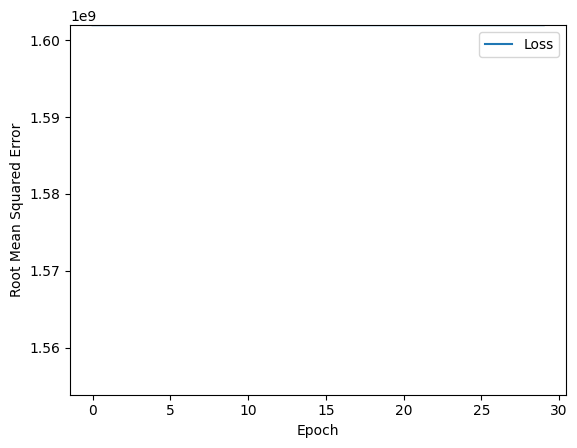

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 10
epochs = 30
batch_size = 1

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
epochs, rmse = train_model(my_model, dfFeatures.to_numpy(), dfLabel, epochs, batch_size)

# print("\nThe learned weight for your model is %.4f" % weight)
# print("The learned bias for your model is %.4f\n" % bias )

# plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
# plotter = tfdocs.plots.HistoryPlotter(metric = 'sparse_categorical_crossentropy', smoothing_std=10)
# plotter.plot(size_histories)
# plt.ylim([0.5, 0.7])


## Use the model to make predictions

You can use the trained model to make predictions. In practice, [you should make predictions on examples that are not used in training](https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data). However, for this exercise, you'll just work with a subset of the same training dataset. A later Colab exercise will explore ways to make predictions on examples not used in training.

First, run the following code to define the house prediction function:

In [ ]:
def predict(feature, label):
  """Predict house values based on a feature."""
  predicted_values = my_model.predict_on_batch(x=feature)
  print(predicted_values)
  show_metrics(label.astype(float), predicted_values)

In [ ]:
dfTestScaled = pd.DataFrame()
for colNum in range(0, len(dfTest.columns)):
    dfTestScaled[dfTest.columns[colNum]] = (dfTest[dfTest.columns[colNum]] - dfMeans[colNum]) / dfStdevs[colNum]
    # dfTestScaled = (dfTest - dfMeans) / dfStdevs

# shift the wole test set to be positive
# dfTestScaled = dfTestScaled + 3

# add year column back
dfTestScaled['YEAR'] = dfTest['YEAR']
dfTestScaled['SIZE_HA_BIN'] = dfFireWeather[dfFireWeather['YEAR'].isin(
    [2017, 2018, 2019, 2020])]['SIZE_HA'].copy(deep=True)


In [ ]:
print(dfTestScaled.drop(excludeList, axis=1).dtypes)
print(dfTestScaled['SIZE_HA_BIN'].dtypes)

MONTH                float64
ELEVATIONM           float64
DIST_TO_WATER        float64
LONGBIN              float64
LATBIN               float64
7daySumMaxTemp       float64
7daySumHumidity      float64
7daySumWindSpeed     float64
7dayRain             float64
14daySumMaxTemp      float64
14daySumHumidity     float64
14daySumWindSpeed    float64
14dayRain            float64
dtype: object
float64


In [ ]:
predict(dfTestScaled.drop(excludeList, axis=1), dfTestScaled['SIZE_HA_BIN'])

[[0.09999374 0.10000841 0.10000069 0.09999401 0.09999393 0.09998921
  0.10000631 0.0999936  0.1000274  0.09999272]
 [0.09999374 0.10000841 0.10000069 0.09999401 0.09999393 0.09998921
  0.10000631 0.0999936  0.1000274  0.09999272]
 [0.09999374 0.10000841 0.10000069 0.09999401 0.09999393 0.09998921
  0.10000631 0.0999936  0.1000274  0.09999272]
 [0.09999374 0.10000841 0.10000069 0.09999401 0.09999393 0.09998921
  0.10000631 0.0999936  0.1000274  0.09999272]
 [0.09999374 0.10000841 0.10000069 0.09999401 0.09999393 0.09998921
  0.10000631 0.0999936  0.1000274  0.09999272]
 [0.09999374 0.10000841 0.10000069 0.09999401 0.09999393 0.09998921
  0.10000631 0.0999936  0.1000274  0.09999272]
 [0.09999374 0.10000841 0.10000069 0.09999401 0.09999393 0.09998921
  0.10000631 0.0999936  0.1000274  0.09999272]
 [0.09999374 0.10000841 0.10000069 0.09999401 0.09999393 0.09998921
  0.10000631 0.0999936  0.1000274  0.09999272]
 [0.09999374 0.10000841 0.10000069 0.09999401 0.09999393 0.09998921
  0.10000631

ValueError: Classification metrics can't handle a mix of continuous and continuous-multioutput targets

In [ ]:
# create nn model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

# train model
model.fit(dfFeatures, dfLabel, epochs=100)



In [ ]:
# predict on test data  
dfTestScaled['PREDICTED_SIZE_HA_BIN10'] = model.predict_classes(dfTestFeatures)

# show metrics for each model
print("Model 10")
show_metrics(dfTestScaled['SIZE_HA_BIN'], dfTestScaled['PREDICTED_SIZE_HA_BIN10'])